In [1]:
import sys
sys.path.append('./GedankenNet-mps/GedankenNet')

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import os
import numpy as np

# Data
**Input**: hologram, or observation of amplitudes at different distances from z0.  
**Output**: wave amplitude and phase at z0.  

In [3]:
data = sio.loadmat('GedankenNet-mps/demo_data/stained_tissue/lung_demo_FOV1.mat')
print([k for k in data.keys() if not k.startswith('__')])

['inputData', 'targetData']


In [4]:
datasets = [
    ("Stained lung",      "GedankenNet-mps/demo_data/stained_tissue/lung_demo_FOV1.mat"),
    ("Stained pap",       "GedankenNet-mps/demo_data/stained_tissue/pap_demo_FOV1.mat"),
    ("Unstained kidney (1)",  "GedankenNet-mps/demo_data/unstained_tissue/kidney_demo_FOV1.mat"),
    ("Unstained kidney (2)",  "GedankenNet-mps/demo_data/unstained_tissue/kidney_demo_FOV2.mat"),
]

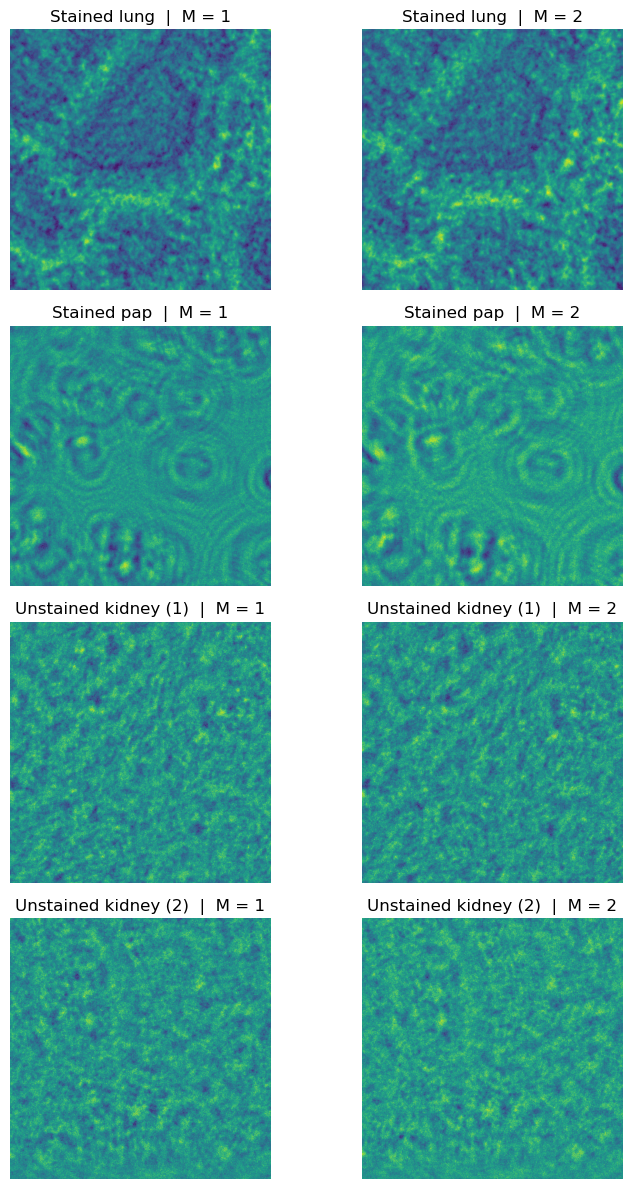

In [5]:
n_rows = len(datasets)
fig, axes = plt.subplots(n_rows, 2, figsize=(8, 3 * n_rows), squeeze=False)

for row, (label, fpath) in enumerate(datasets):
    if not os.path.isfile(fpath):
        raise FileNotFoundError(f"Could not locate: {fpath}")

    mat = sio.loadmat(fpath)
    amp1 = mat["inputData"][:, :, 0]   # M = 1
    amp2 = mat["inputData"][:, :, 1]   # M = 2

    # Left column ─ M = 1
    ax = axes[row, 0]
    im = ax.imshow(amp1, cmap="viridis")
    ax.set_title(f"{label}  |  M = 1")
    ax.axis("off")

    # Right column ─ M = 2
    ax = axes[row, 1]
    im = ax.imshow(amp2, cmap="viridis")
    ax.set_title(f"{label}  |  M = 2")
    ax.axis("off")

plt.tight_layout()
plt.show()

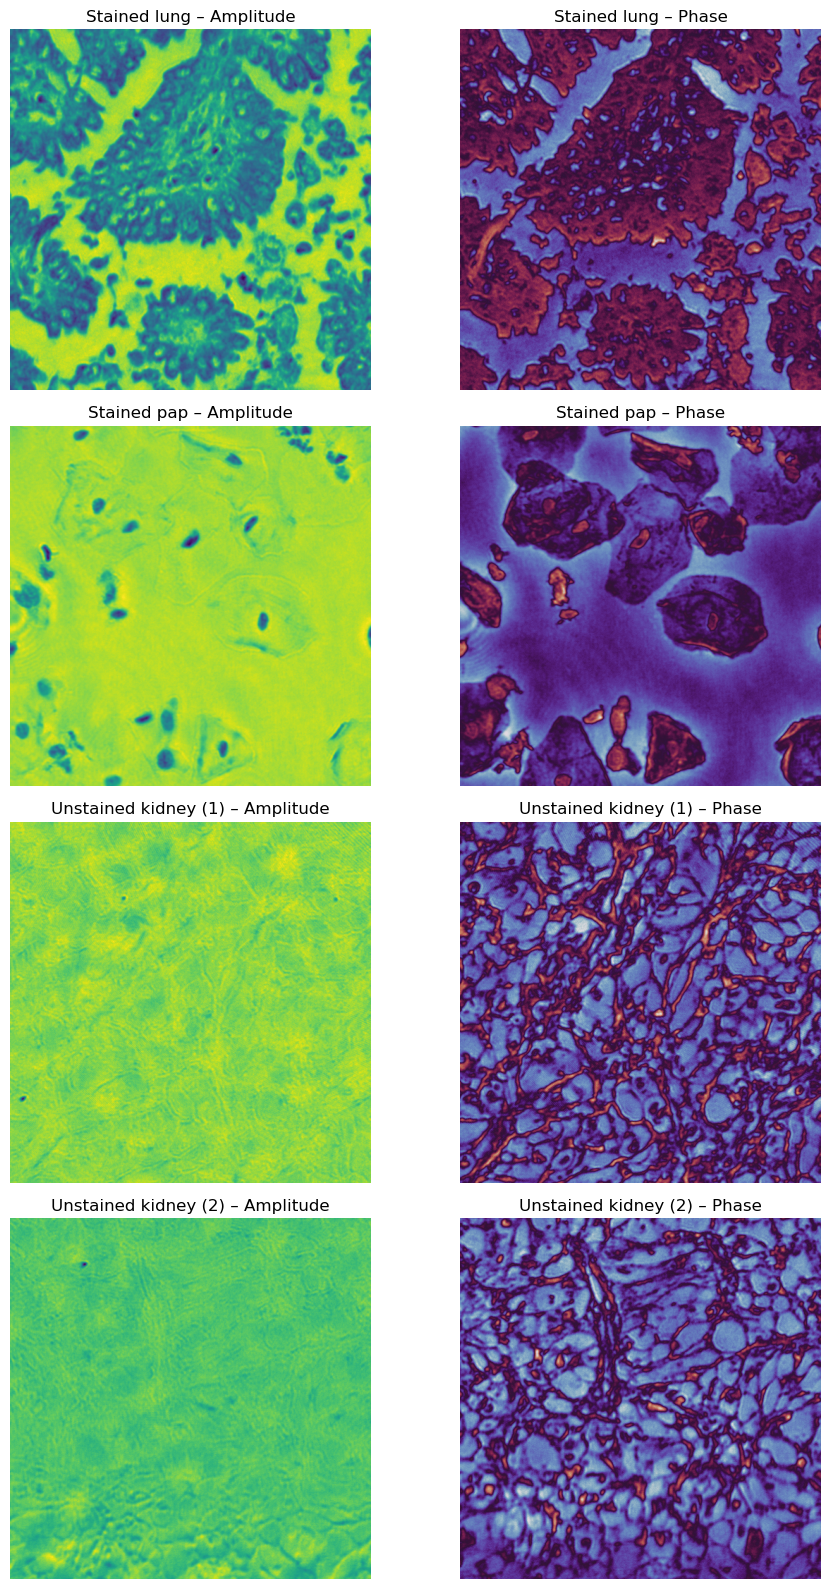

In [6]:
fig, axes = plt.subplots(len(datasets), 2, figsize=(10, 4 * len(datasets)))

for row, (label, path) in enumerate(datasets):
    mat = sio.loadmat(path)

    amp = mat["targetData"][:, :, 0]   # Amplitude at z0
    phase = mat["targetData"][:, :, 1]   # Phase at z0

    # Amplitude
    ax = axes[row, 0]
    ax.imshow(amp)             
    ax.set_title(f"{label} – Amplitude")
    ax.axis("off")

    # Phase
    ax = axes[row, 1]
    ax.imshow(phase, cmap='twilight')
    ax.set_title(f"{label} – Phase")
    ax.axis("off")

plt.tight_layout()
plt.show()

# Train the model
1. Generate the fake training samples. Each sample consists of a fake image representing amplitude at z0 and another fake image representing the phase.
2. Run GedankenNet training.  

## Fake samples generation

In [ ]:
from generate_random_image_parallel import main
main()

In [5]:
from my_tools import GedankenDataset
import np_transforms

[GedankenDataset] Pre-loaded 1 images (1.0 MiB)


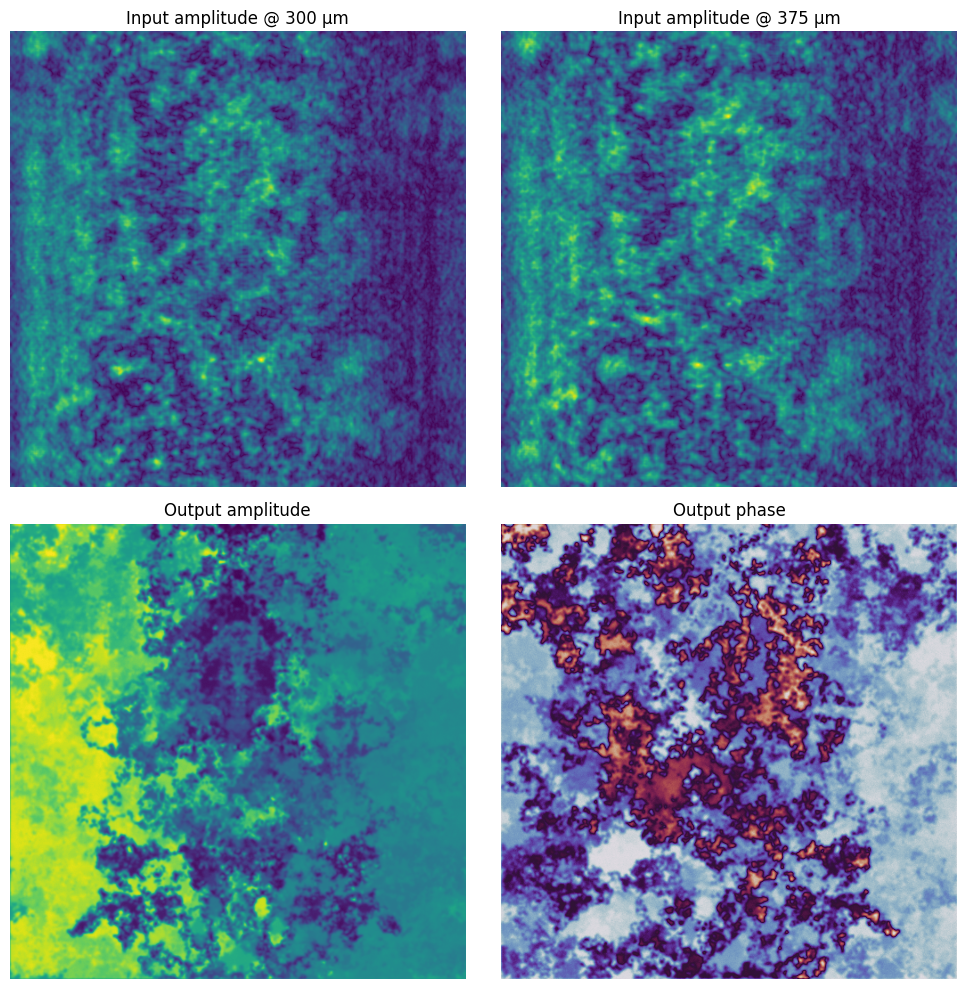

In [6]:
dataset = GedankenDataset(
    ['training_data/00100.png'], 
    [300, 375], # sample to sensor distances
    np_transforms.Compose([
        np_transforms.RandomCrop(512),
        np_transforms.RandomHorizontalFlip(),
        np_transforms.ToTensor()
    ]), 
    {
        'wavelength': 0.530,
        'pixel_size': 0.3733,
        'patch_size': 512,
        'ref_ind': 1.00
    }
)

inp_amps, out_wavefront = dataset[0]

inp_amps_np = inp_amps.numpy() 
out_wavefront_np = out_wavefront.numpy()

out_amp, out_phase = out_wavefront_np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
    axs[0, i].imshow(inp_amps_np[i])
    axs[0, i].set_title(f"Input amplitude @ { (300, 375)[i] } µm")
    axs[0, i].axis('off')

axs[1, 0].imshow(out_amp)
axs[1, 0].set_title("Output amplitude")
axs[1, 0].axis('off')

axs[1, 1].imshow(out_phase, cmap='twilight')
axs[1, 1].set_title("Output phase")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

[GedankenDataset] Pre-loaded 1 images (1.0 MiB)


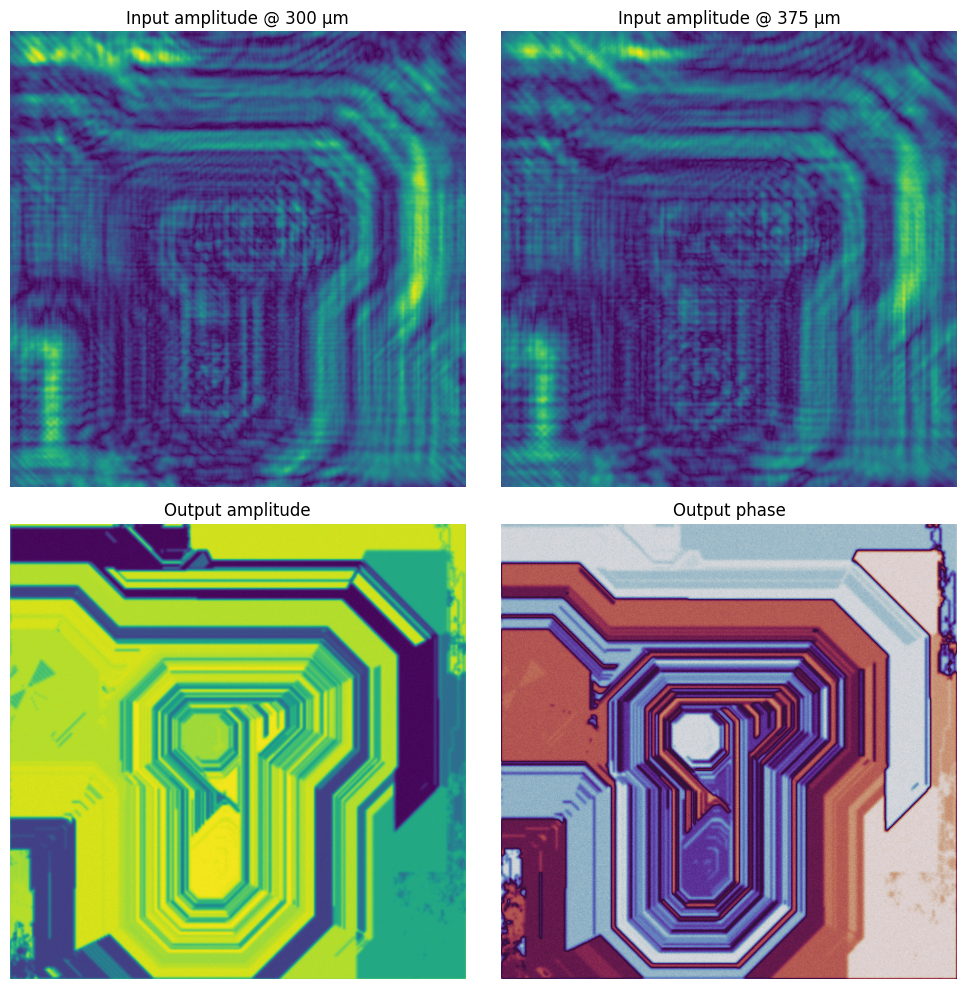

In [7]:
dataset = GedankenDataset(
    ['training_data/00050.png'], 
    [300, 375], # sample to sensor distances
    np_transforms.Compose([
        np_transforms.RandomCrop(512),
        np_transforms.RandomHorizontalFlip(),
        np_transforms.ToTensor()
    ]), 
    {
        'wavelength': 0.530,
        'pixel_size': 0.3733,
        'patch_size': 512,
        'ref_ind': 1.00
    }
)

inp_amps, out_wavefront = dataset[0]

inp_amps_np = inp_amps.numpy() 
out_wavefront_np = out_wavefront.numpy()

out_amp, out_phase = out_wavefront_np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
    axs[0, i].imshow(inp_amps_np[i])
    axs[0, i].set_title(f"Input amplitude @ { (300, 375)[i] } µm")
    axs[0, i].axis('off')

axs[1, 0].imshow(out_amp)
axs[1, 0].set_title("Output amplitude")
axs[1, 0].axis('off')

axs[1, 1].imshow(out_phase, cmap='twilight')
axs[1, 1].set_title("Output phase")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Training

In [3]:
from train_Gedanken import main
main()

[GedankenDataset] Pre-loaded 20000 images (20000.0 MiB)
[HoloDataset] Pre-loaded 4 files (16.0 MiB)
building scales 0
	shared params 1
building scales 1
	shared params 1
building scales 2
	shared params 2
building scales 3
	shared params 2
building scales 4
	shared params 2
building scales 5
	not shared params 4 4 
building scales 6
	not shared params 4 4 
building scales 7
	not shared params 4 4 
Trainable parameters: 39,374,306
Epoch    0 │ time   29.7s │ train MSE 6.8016e-01 │ valid MSE 3.1080e-02
Epoch    1 │ time   25.0s │ train MSE 6.2644e-01 │ valid MSE 2.7520e-02
Epoch    2 │ time   24.8s │ train MSE 6.1960e-01 │ valid MSE 2.6981e-02
Epoch    3 │ time   24.9s │ train MSE 5.9137e-01 │ valid MSE 2.4142e-02
Epoch    4 │ time   24.7s │ train MSE 5.7628e-01 │ valid MSE 2.4149e-02
Epoch    5 │ time   24.7s │ train MSE 5.8728e-01 │ valid MSE 2.3750e-02
Epoch    6 │ time   24.9s │ train MSE 5.9039e-01 │ valid MSE 2.3270e-02
Epoch    7 │ time   25.0s │ train MSE 5.9673e-01 │ valid MSE 2

In [7]:
%load_ext tensorboard               
%tensorboard --logdir "runs/FNO_ep=1000_m=256_w=48_z=[300, 375]_Gedanken" --port 6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 5389), started 0:00:30 ago. (Use '!kill 5389' to kill it.)